In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from modules.mc_forrest import mc_forrest
from modules.mc_xgb import mc_xgb

import pickle

In [11]:
df = pd.read_csv('./processed_data/train_and_test.csv')
df['date'] = pd.to_datetime(df['date'])


X = df.drop(['date', 'flow'], axis=1)
y = df['flow']

X.head(10)

,station,zip,max_temperaturef,mean_temperaturef,min_temperaturef,max_dew_pointf,meandew_pointf,min_dewpointf,max_humidity,mean_humidity,...,events_Rain-Thunderstorm,events_sunny,last_1_flow,last_2_flow,last_4_flow,last_5_flow,hour,dow,month,woy
0,2,95113,77.0,68.0,59.0,60.0,58.0,56.0,93.0,72.0,...,False,True,NaN,NaN,NaN,NaN,7,1,9,36
1,2,95113,77.0,68.0,59.0,60.0,58.0,56.0,93.0,72.0,...,False,True,-4.0,NaN,NaN,NaN,9,1,9,36
2,2,95113,77.0,68.0,59.0,60.0,58.0,56.0,93.0,72.0,...,False,True,1.0,-4.0,NaN,NaN,13,1,9,36
3,2,95113,77.0,68.0,59.0,60.0,58.0,56.0,93.0,72.0,...,False,True,2.0,1.0,NaN,NaN,17,1,9,36
4,2,95113,79.0,69.0,58.0,59.0,56.0,53.0,90.0,68.0,...,False,True,3.0,2.0,-4.0,NaN,6,2,9,36
5,2,95113,79.0,69.0,58.0,59.0,56.0,53.0,90.0,68.0,...,False,True,-2.0,3.0,1.0,-4.0,7,2,9,36
6,2,95113,79.0,69.0,58.0,59.0,56.0,53.0,90.0,68.0,...,False,True,-2.0,-2.0,2.0,1.0,9,2,9,36
7,2,95113,79.0,69.0,58.0,59.0,56.0,53.0,90.0,68.0,...,False,True,4.0,-2.0,3.0,2.0,15,2,9,36
8,2,95113,79.0,69.0,58.0,59.0,56.0,53.0,90.0,68.0,...,False,True,0.0,4.0,-2.0,3.0,17,2,9,36
9,2,95113,79.0,69.0,58.0,59.0,56.0,53.0,90.0,68.0,...,False,True,-5.0,0.0,-2.0,-2.0,18,2,9,36


In [12]:
y.head()

0   -4
1    1
2    2
3    3
4   -2
Name: flow, dtype: int64

In [13]:
# Dividi il dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
magic_number = abs(y_train.min())

y_train = y_train + magic_number
y_test = y_test + magic_number

res = dict(
    RandomForrest = mc_forrest(X_train, y_train, X_test, y_test),
    XGB = mc_xgb(X_train, y_train, X_test, y_test),
)

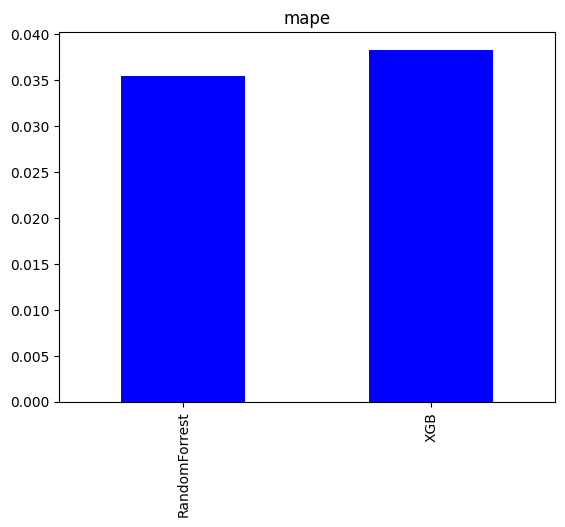

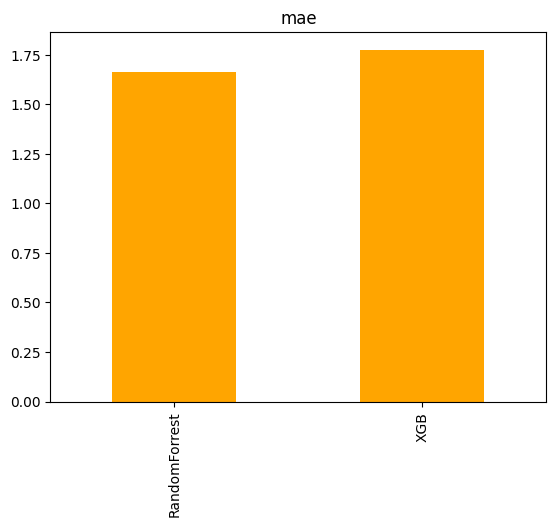

In [14]:
tab = pd.DataFrame(res).T[['mape', 'mae']]
fig, ax = plt.subplots()
tab['mape'].plot.bar(color='blue', ax=ax, title='mape')
fig.savefig('./results/train/train_mape.jpg', bbox_inches='tight')

fig, ax = plt.subplots()
tab['mae'].plot.bar(color='orange', ax=ax, title='mae')
fig.savefig('./results/train/train_mae.jpg', bbox_inches='tight')



In [15]:
tab['mae'].idxmin()

'RandomForrest'

In [16]:
best_model = res[tab['mae'].idxmin()]['model']

with open('./model/best_model.pkl', 'wb') as f: pickle.dump(best_model, f)
with open('./model/magic_number.pkl', 'wb') as f: pickle.dump(magic_number, f)

f = open('./results/train/summary.txt', 'w')
f.write(f'model:{best_model}')
f.write(f'magic_number:{magic_number}')
f.close()
tab.to_csv('./results/train/stats.csv',)
